In [21]:
import pandas as pd
import gpxo
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import warnings
import datetime
from tcxreader.tcxreader import TCXReader, TCXExercise
import tcxparser

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')


In [22]:
# Caminho da pasta que terá iteração nos seus arquivos
folder_path = 'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/scripts_prediction_model/tests_and_preprocessing/feature_eng_with_file_formats/tcx/kaggle_data'

### Conferindo se algum arquivo está com problema de leitura

In [23]:

# Contador de linhas para servir de index
error_count = 0

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)    
    
    try:
        
        tcx_reader = TCXReader()
        data: TCXExercise = tcx_reader.read(full_path)
        data.start_time.date()

    except:

        # Printa o index e o nome do arquivo que ocorreu algum erro na leitura
        print(f"An error ocurred on {filename}")
    
        # Acréscimo no contador para reiniciar o loop
        error_count +=1
print(error_count)


An error ocurred on 030370a8-2988-4b6f-b419-5b33ec76c502.tcx
An error ocurred on 0326fc84-2b64-4102-88f7-715d1cdc29f9.tcx
An error ocurred on 048ed7a2-01cb-4c7c-950d-cba0bbae03fc.tcx
An error ocurred on 0697a42b-e2d4-4640-b5b8-0be908396daf.tcx
An error ocurred on 0853371b-d5bd-4edf-8f81-053171dfcae5.tcx
An error ocurred on 0d9bb90a-6e9d-44b2-bff9-f14037a8c2cb.tcx
An error ocurred on 0fbfcc55-9a11-4ff6-91c7-8339d4ae2818.tcx
An error ocurred on 1135358b-ecc5-4e5c-b1f5-f82cf236457d.tcx
An error ocurred on 150bf80e-d356-4012-afb2-ea761f8f5d2b.tcx
An error ocurred on 1acacd80-f903-4464-b411-3cf2929caedf.tcx
An error ocurred on 1baaa324-342a-416f-a094-053b9b48d4c8.tcx
An error ocurred on 208f7728-540f-412f-81db-a2072f35c1a6.tcx
An error ocurred on 20db0610-7b78-425c-b819-1ddc67ef9c32.tcx
An error ocurred on 24d5560f-7c73-423b-bb2c-b1d76f0830d5.tcx
An error ocurred on 24ded15a-3545-4661-a4e9-0dbdb438aa29.tcx
An error ocurred on 2bb458a8-90d5-45fa-b0da-27889952fac4.tcx
An error ocurred on 2d30

In [27]:
# Dicionário com as features que serão criadas com o valor de cada atividade
df_athlete_dict = {
    'activity_date': [],
    'activity_type': [],
    'total_distance (km)': [], 
    'total_time (min)': [],
    'pace (min/km)': [],
    'velocity (km/h)': []    
}

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)
    
    try:
        
        tcx_reader = TCXReader()
        data: TCXExercise = tcx_reader.read(full_path)

        # Data da atividade (a partir da primeira linha do df original com os pontos marcados)
        df_athlete_dict['activity_date'].append(pd.Timestamp(data.start_time.date()))

        # Criação da coluna com tipo da atividade
        df_athlete_dict['activity_type'].append(data.activity_type)

        # Distância total em km
        total_dist = data.distance / 1000
        df_athlete_dict['total_distance (km)'].append(round(total_dist,2))

        # Tempo total em minutos
        total_min = (data.end_time - data.start_time).total_seconds() // 60
        df_athlete_dict['total_time (min)'].append(total_min)

        # Ritmo geral da atividade
        if total_dist == 0:
            df_athlete_dict['pace (min/km)'].append(0)
        else:
            df_athlete_dict['pace (min/km)'].append(round(total_min / total_dist, 2))

        # Velocidade em km/h
        df_athlete_dict['velocity (km/h)'].append(round(data.avg_speed,2))

        print('tcxreader')
    except:
    
        tcx_parser = tcxparser.TCXParser(full_path)

        ''' Cocantenação dos elementos novos no df a cada iteração '''

        # Data da atividade (a partir da primeira linha do df original com os pontos marcados)
        df_athlete_dict['activity_date'].append(pd.Timestamp(tcx_parser.started_at).tz_convert('America/Sao_Paulo').tz_localize(None).normalize())

        # Criação da coluna com tipo da atividade
        df_athlete_dict['activity_type'].append(tcx_parser.activity_type)

        # Distância total em km
        total_dist = tcx_parser.distance / 1000
        df_athlete_dict['total_distance (km)'].append(round(total_dist, 2))

        # Tempo total em minutos
        try:
            total_min = tcx_parser.duration // 60

        # Exceção caso não haja no arquivo tcx "<TotalTimeSeconds>"
        except:
            total_min = (pd.Timestamp(tcx_parser.completed_at) - pd.Timestamp(tcx_parser.started_at)).total_seconds() // 60

        df_athlete_dict['total_time (min)'].append(total_min)

        # Ritmo geral da atividade
        if total_dist == 0:
            df_athlete_dict['pace (min/km)'].append(0)
        else:
            df_athlete_dict['pace (min/km)'].append(round(total_min / total_dist, 2))

        # Velocidade em km/h
        df_athlete_dict['velocity (km/h)'].append(round(total_dist / (total_min/60),2))
        print('tcxparser')



tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxparser
tcxreader
tcxparser
tcxreader
tcxreader
tcxparser
tcxreader
tcxparser
tcxreader
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader


In [28]:
# Passando o dicionário com as features criadas para um Dataframe
df_athlete_activities = pd.DataFrame(df_athlete_dict)
df_athlete_activities

,activity_date,activity_type,total_distance (km),total_time (min),pace (min/km),velocity (km/h)
0,2021-01-28,Running,7.33,44.0,6.00,9.97
1,2019-12-03,other,0.00,7.0,0.00,0.00
2,2021-05-27,other,0.00,30.0,0.00,0.00
3,2018-12-07,other,0.00,15.0,0.00,0.00
4,2021-06-07,other,0.00,5.0,0.00,0.00
...,...,...,...,...,...,...
203,2021-01-10,Running,9.30,58.0,6.24,9.54
204,2021-06-30,other,0.00,3.0,0.00,0.00
205,2022-08-11,Running,8.10,49.0,6.05,9.82
206,2023-02-11,Running,15.01,89.0,5.93,10.09


In [34]:
df_athlete_activities[df_athlete_activities['activity_type'].isin(['Running', 'running'])].describe()

,activity_date,total_distance (km),total_time (min),pace (min/km),velocity (km/h)
count,146,146.000000,146.000000,146.000000,146.000000
mean,2021-01-08 14:47:40.273972480,6.970822,39.842466,365.065548,84.703425
min,2018-10-20 00:00:00,0.000000,-2.000000,-0.400000,0.000000
25%,2019-01-10 18:00:00,4.557500,18.250000,4.675000,9.120000
50%,2021-01-28 12:00:00,6.455000,41.000000,5.990000,9.875000
75%,2022-08-07 12:00:00,9.945000,59.000000,6.507500,12.615000
max,2023-02-20 00:00:00,21.090000,128.000000,25581.400000,3981.180000
std,NaN,3.819092,24.879763,2739.564168,427.135717


In [29]:
# Removendo datas duplicadas relacionadas à 2 ou mais atividades no mesmo dia
df_athlete_activities.drop_duplicates(subset='activity_date', inplace= True)

In [30]:
# Atribuindo tipo de atividade para 'Atividade'
df_athlete_activities.insert(2, 'activity_type', 'Atividade')

ValueError: cannot insert activity_type, already exists

In [ ]:
# Ordenando a data da menor pra maior e resetando index
df_athlete_activities.sort_values('activity_date', ascending=True, inplace=True)
df_athlete_activities.reset_index(drop=True, inplace= True)

In [ ]:
# Fazendo a diferença entre a atividade seguinte e a anterior e preenchendo a primeira linha com 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['activity_date'].diff(periods=1).fillna(datetime.timedelta(days=1))

# Alterando o tipo da coluna para int
df_athlete_activities['days_between_activities'] = (df_athlete_activities['days_between_activities'].dt.days) - 1

In [ ]:
# Data da primeira atividade
start = df_athlete_activities['activity_date'].iloc[0]

# Data da última atividade
end = df_athlete_activities['activity_date'].iloc[-1]

# Dias entre a primeira e última atividade
dates = pd.date_range(start,end,freq='d')

# Colocando todas as datas em um df
df_dates = pd.DataFrame({'activity_date': dates})
df_dates

,activity_date
0,2018-10-20
1,2018-10-21
2,2018-10-22
3,2018-10-23
4,2018-10-24
...,...
1580,2023-02-16
1581,2023-02-17
1582,2023-02-18
1583,2023-02-19


In [ ]:
df_athlete_activities

,activity_date,total_distance (km),activity_type,total_time (min),pace (min/km),velocity (km/h),days_between_activities
0,2018-10-20,2.05,Atividade,6.0,2.93,19.11,0
1,2018-10-21,0.03,Atividade,17.0,569.90,0.11,0
2,2018-10-22,0.03,Atividade,12.0,381.19,0.16,0
3,2018-10-23,0.04,Atividade,20.0,449.03,0.13,0
4,2018-10-24,2.05,Atividade,12.0,5.84,9.89,0
...,...,...,...,...,...,...,...
175,2023-01-24,15.01,Atividade,69.0,4.60,12.97,3
176,2023-01-31,15.01,Atividade,94.0,6.26,9.58,6
177,2023-02-07,15.02,Atividade,95.0,6.33,9.47,6
178,2023-02-11,15.01,Atividade,89.0,5.93,10.09,3


In [ ]:
# Right join pra poder manter os dados das atividades existentes mas adicionar linhas para os novos dias
df_athlete_activities = df_dates.merge(df_athlete_activities, on='activity_date', how='left')

# Preechendo os valores nulos como Dia sem atividade
df_athlete_activities['activity_type'].fillna('Dia sem atividade', inplace=True)

In [ ]:
# Preenchendo os valores NaN com 1 para poder fazer uma subtração cumulativa
df_athlete_activities['days_between_activities'].fillna(-1, inplace= True)

# Fazendo cumsum com valores negativos e depois multiplicando por -1 pra transformá-los em positivos
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].cumsum() * -1

# Transformando em int pra evitar -0 ao invés de 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].astype(int)

In [ ]:
df_athlete_activities

,activity_date,total_distance (km),activity_type,total_time (min),pace (min/km),velocity (km/h),days_between_activities
0,2018-10-20,2.05,Atividade,6.0,2.93,19.11,0
1,2018-10-21,0.03,Atividade,17.0,569.90,0.11,0
2,2018-10-22,0.03,Atividade,12.0,381.19,0.16,0
3,2018-10-23,0.04,Atividade,20.0,449.03,0.13,0
4,2018-10-24,2.05,Atividade,12.0,5.84,9.89,0
...,...,...,...,...,...,...,...
1580,2023-02-16,NaN,Dia sem atividade,NaN,NaN,NaN,5
1581,2023-02-17,NaN,Dia sem atividade,NaN,NaN,NaN,6
1582,2023-02-18,NaN,Dia sem atividade,NaN,NaN,NaN,7
1583,2023-02-19,NaN,Dia sem atividade,NaN,NaN,NaN,8


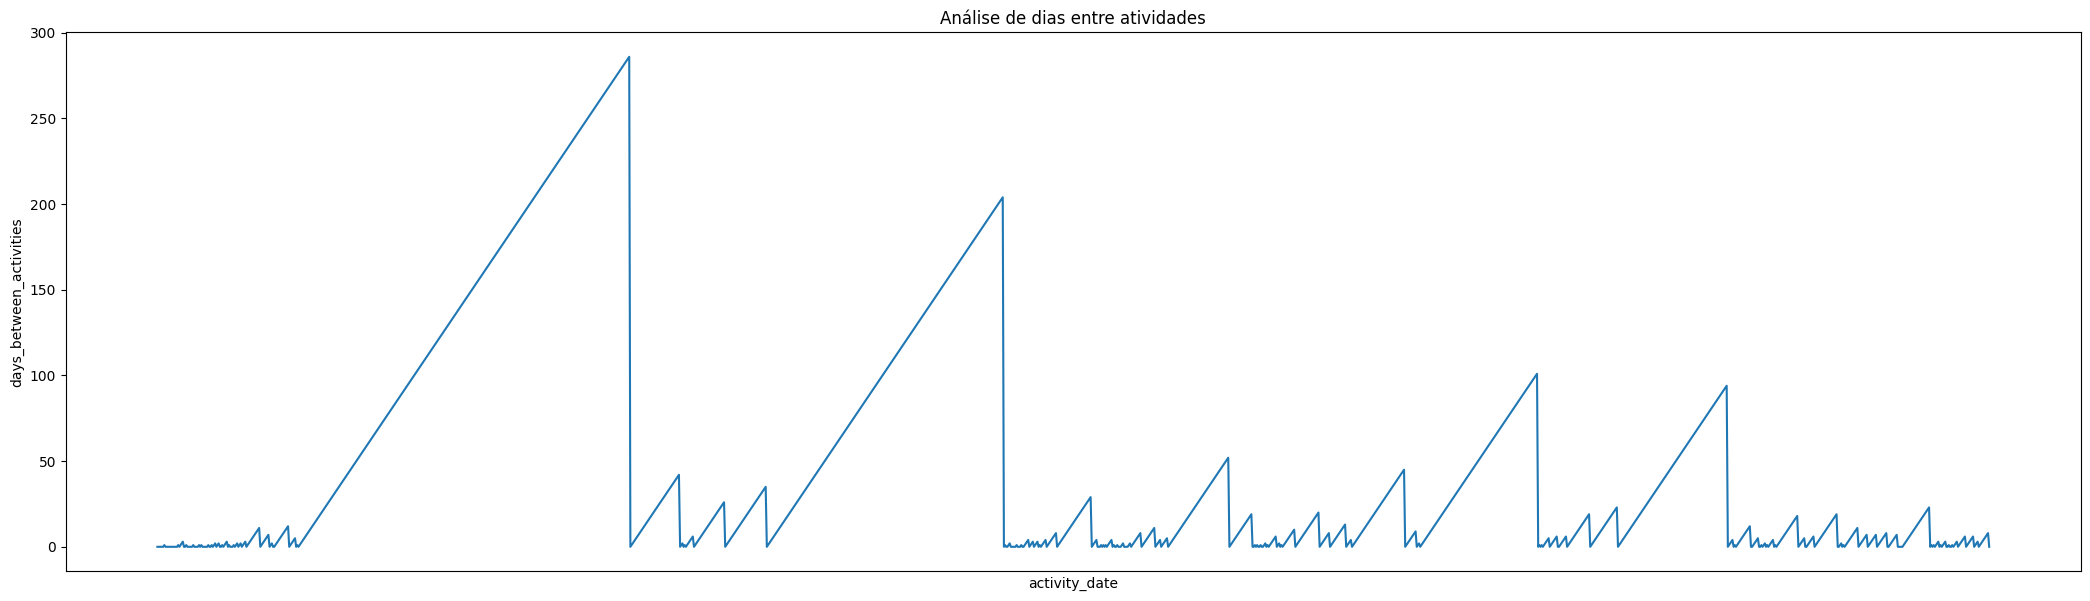

In [ ]:
fig, ax = plt.subplots(figsize =(26, 7))
sns.lineplot(x = 'activity_date', y= 'days_between_activities', data= df_athlete_activities)
plt.xticks([])
plt.title('Análise de dias entre atividades')
plt.show()